In [3]:
#Primer grafa s SDCTD številom
g = Graph([(0,1),(2,3)])
h = g.complement()  

#Primer grafa brez SDCTD števila
m = Graph([(0,1),(1,2),(1,3)])

In [3]:
#Osnivni CLP program, dejansko je malce napačen, glej naslednji dve kodi
p = MixedIntegerLinearProgram(maximization = False)
x = p.new_variable(binary = True)
p.set_objective(sum([x[v] for v in g]))

for v in g.vertices():
    p.add_constraint(sum((x[w] + x[v]) for w in g.neighbors(v)) >= 1) 

zaustavi = False
    
for v in g.vertices():
    neighbors_complement = h.neighbors(v)  
    if neighbors_complement:  
        p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        
    else:
        print("Slaba, graf nima SDCTD dominacije")  
        zaustavi = True
        break 
        
if not zaustavi == True:
    p.solve()
    x = p.get_values(x)
    print([v for v, i in x.items() if i == 1])  

[0, 2]


In [4]:
#Dominacijska množica
def SDCTD_mnozica(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return([v for v, i in x.items() if i == 1]) 
    else:
        return None

In [1]:
#SDCTD število
def SDCTD_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else:
            print("Slaba, graf nima SDCTD dominacije")  
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None
 

Slaba, graf nima SDCTD dominacije
Slaba, graf nima SDCTD dominacije


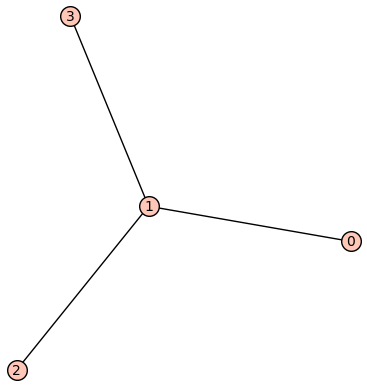

In [6]:
SDCTD_stevilo(m)
SDCTD_mnozica(m)
m.show()

In [7]:
#SDCTD število 2, le rahlo prilagodimo, da max_st ne meče print(...)
def SDCTD_stevilo2(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization = False)
    x = p.new_variable(binary = True)
    p.set_objective(sum([x[v] for v in g]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)  
        if neighbors_complement:  
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)

        else: 
            zaustavi = True
            break 

    if not zaustavi == True:
        p.solve()
        x = p.get_values(x)
        return(sum(1 for i in x.values() if i == 1))
    else:
        return None

In [8]:
def max_st(n):
    vsi_grafi = list(graphs(n))
    
    seznam = [] #seznam s SDCTD števili
    ustrezni_grafi = []  # seznam z grafi

    for g in vsi_grafi:
        stevilo = SDCTD_stevilo2(g)
        
        if stevilo is not None:
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  

    max_vrednost = max(seznam)

    max_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == max_vrednost]
    
    print(f"Grafi z max SDCTD številom ({max_vrednost}):")
    for g in max_grafi:
        g.show()




In [9]:
max_st(7)

KeyboardInterrupt: 

In [11]:
#Koda seveda ne izpisuje grafov, za katere ne obstaja SDCTD dominacijsko število
def min_st(n):
    vsi_grafi = list(graphs(n)) #vsi grafi na n vozliščih
    
    seznam = [] #za SDCTD števila
    ustrezni_grafi = []  # za grafe
    
    for g in vsi_grafi:
        stevilo = SDCTD_stevilo2(g)
        
        if stevilo is not None:
            seznam.append(stevilo)
            ustrezni_grafi.append(g)
    
    if not ustrezni_grafi:
        print("Ne obstajajo grafi s SDCTD številom")
        return None  
    
    # min SDCTD število
    min_vrednost = min(seznam)
    
    # Vsi taki grafi
    min_grafi = [ustrezni_grafi[i] for i in range(len(ustrezni_grafi)) if seznam[i] == min_vrednost]
    
    print(f"Grafi z min SDCTD številom ({min_vrednost}):")
    for g in min_grafi:
        g.show()


Grafi z min SDCTD številom (2):


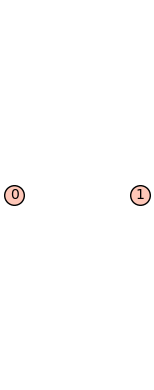

In [12]:
import random

def _random_sdctd(graf, verjetnost=0.5, iteracije=1000):
    najboljsa_mnozica = []
    najmanjsa_velikost = len(graf.vertices())
    
    if not je_sdctd(graf, graf.complement(), graf.vertices()):
        return "Graf nima SDCTD dominacije"
    
    for _ in range(iteracije):
        kandidati = [v for v in graf.vertices() if random.random() < verjetnost]
        
        if je_sdctd(graf, graf.complement(), kandidati):
            if len(kandidati) < najmanjsa_velikost:
                najboljsa_mnozica = kandidati
                najmanjsa_velikost = len(kandidati)

    return najboljsa_mnozica, najmanjsa_velikost


In [1]:
import random

#vrne nazaj prvotno, če ni nobene druge, tudi če to pomeni, da taka množica sploh ne obstaja

# Function to check if a subset of vertices forms an SDCTD set
def is_sdctd(g, h, subset):
    # Dominating Set Condition: Each vertex in g is either in subset or has a neighbor in subset
    for v in g.vertices():
        if v not in subset and not any(w in subset for w in g.neighbors(v)):
            return False  # Dominating set condition not met

    # Complement Total Dominating Condition: Each vertex in h has at least one neighbor in subset
    for v in h.vertices():
        if not any(w in subset for w in h.neighbors(v)):
            return False  # Complement total dominating condition not met
    
    return True

# Random search function to find an approximate minimum SDCTD set
def random_search_sdctd(g, iterations=1000, inclusion_prob=0.5):
    h = g.complement()  # Compute the complement of the graph
    best_sdctd = []  # Start with an empty set as the initial best solution
    best_size = len(g.vertices())  # Start with the largest possible size

    for _ in range(iterations):
        # Generate a random subset of vertices with probability inclusion_prob
        random_subset = [v for v in g.vertices() if random.random() < inclusion_prob]
        
        # Check if the subset is a valid SDCTD set
        if is_sdctd(g, h, random_subset):
            subset_size = len(random_subset)
            # Update the best solution if the current subset is smaller
            if subset_size < best_size:
                best_sdctd = random_subset
                best_size = subset_size

    return best_sdctd, best_size




In [14]:
#podobno še za min

import random

# Function to check if a subset of vertices forms an SDCTD set
def is_sdctd(g, h, subset):
    # Dominating Set Condition: Each vertex in g is either in subset or has a neighbor in subset
    for v in g.vertices():
        if v not in subset and not any(w in subset for w in g.neighbors(v)):
            return False  # Dominating set condition not met

    # Complement Total Dominating Condition: Each vertex in h has at least one neighbor in subset
    for v in h.vertices():
        if not any(w in subset for w in h.neighbors(v)):
            return False  # Complement total dominating condition not met
    
    return True

# Random search function to find an approximate maximum SDCTD set
def random_search_max_sdctd(g, iterations=1000, inclusion_prob=0.5):
    h = g.complement()  # Compute the complement of the graph
    best_sdctd2 = []  # Start with an empty set as the initial best solution
    best_size2 = 0  # Start with zero as the initial largest size

    for _ in range(iterations):
        # Generate a random subset of vertices with probability inclusion_prob
        random_subset = [v for v in g.vertices() if random.random() < inclusion_prob]
        
        # Check if the subset is a valid SDCTD set
        if is_sdctd(g, h, random_subset):
            subset_size = len(random_subset)
            # Update the best solution if the current subset is larger
            if subset_size > best_size:
                best_sdctd2 = random_subset
                best_size2 = subset_size

    return best_sdctd2, best_size2


In [24]:
# morda pravilen stochastic search pristop k CLP. 

import random

# Function to check if a subset of vertices forms an SDCTD set
def is_sdctd(g, h, subset):
    # Dominating Set Condition: Each vertex in g is either in subset or has a neighbor in subset
    for v in g.vertices():
        if v not in subset and not any(w in subset for w in g.neighbors(v)):
            return False  # Dominating set condition not met

    # Complement Total Dominating Condition: Each vertex in h has at least one neighbor in subset
    for v in h.vertices():
        if not any(w in subset for w in h.neighbors(v)):
            return False  # Complement total dominating condition not met
    
    return True

# Random search function to find an approximate minimum SDCTD set
def random_search_sdctd(g, iterations=1000, inclusion_prob=0.5):
    h = g.complement()  # Compute the complement of the graph
    best_sdctd = g.vertices()  # Initialize with the full set of vertices as the initial best solution
    best_size = len(best_sdctd)

    for _ in range(iterations):
        # Generate a random subset of vertices with probability inclusion_prob
        random_subset = [v for v in g.vertices() if random.random() < inclusion_prob]

        # Check if the subset is a valid SDCTD set
        if is_sdctd(g, h, random_subset):
            subset_size = len(random_subset)
            # Update the best solution if the current subset is smaller
            if subset_size < best_size:
                best_sdctd = random_subset
                best_size = subset_size

    return best_sdctd, best_size

In [4]:
best_sdctd, best_size = random_search_sdctd(m, iterations=1000, inclusion_prob=0.5)
best_sdctd
best_size

4

Approximate minimum SDCTD set: [1, 3, 4, 7]
Size of the min SDCTD set: 4


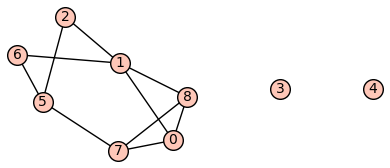

In [7]:
#te funkcije sedaj povejo le za naključen graf katere vrednosti bo zavzel, nas pa zanima za vse grafe velikosti n, kateri ima max. Ponovimo z random grafom dovoljkrat?
g = Graph(9) 
g.add_edges([(i, j) for i in range(100) for j in range(i+1, 9) if random.random() < 0.3])
best_sdctd, best_size = random_search_sdctd(g, iterations=1000, inclusion_prob=0.5)
#best_sdctd2, best_size2 = random_search_max_sdctd(g, iterations = 1000, inclusion_prob = 0.5)
print("Approximate minimum SDCTD set:", best_sdctd)
print("Size of the min SDCTD set:", best_size)
#print("Approximate max SDCTD set:", best_sdctd2)
#print("Size of the max SDCTD set:", best_size2)
g.show()


Iteration 1:
  Approximate minimum SDCTD set: [0, 1, 2, 6, 7, 15]
  Size of the min SDCTD set: 6
  Graph edges: [(0, 17, None), (0, 2, None), (0, 3, None), (0, 19, None), (0, 6, None), (0, 8, None), (0, 11, None), (0, 15, None), (1, 17, None), (1, 18, None), (1, 4, None), (1, 7, None), (1, 11, None), (1, 13, None), (1, 14, None), (1, 15, None), (2, 16, None), (2, 18, None), (2, 4, None), (2, 9, None), (2, 10, None), (3, 16, None), (3, 17, None), (3, 6, None), (3, 10, None), (3, 11, None), (3, 12, None), (4, 13, None), (4, 14, None), (4, 15, None), (5, 6, None), (5, 7, None), (5, 10, None), (5, 13, None), (6, 18, None), (6, 19, None), (6, 10, None), (6, 12, None), (7, 16, None), (7, 10, None), (7, 14, None), (8, 13, None), (8, 14, None)]
--------------------------------------------------


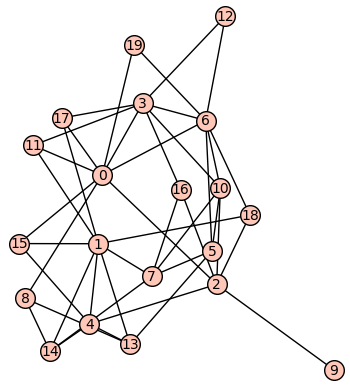

Iteration 2:
  Approximate minimum SDCTD set: [0, 4, 5, 12, 14, 16, 19]
  Size of the min SDCTD set: 7
  Graph edges: [(0, 16, None), (0, 5, None), (0, 8, None), (0, 10, None), (0, 12, None), (0, 15, None), (1, 4, None), (1, 8, None), (2, 16, None), (2, 18, None), (2, 7, None), (2, 13, None), (2, 14, None), (3, 5, None), (3, 6, None), (3, 7, None), (4, 17, None), (4, 8, None), (4, 9, None), (4, 12, None), (4, 13, None), (4, 15, None), (5, 16, None), (5, 18, None), (5, 7, None), (5, 8, None), (5, 11, None), (5, 15, None), (6, 18, None), (6, 7, None), (6, 9, None), (6, 10, None), (6, 12, None), (6, 13, None), (7, 10, None), (7, 11, None), (8, 9, None), (8, 12, None), (8, 15, None)]
--------------------------------------------------


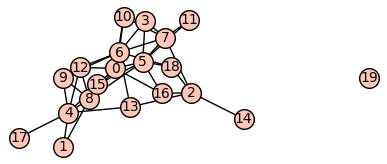

Iteration 3:
  Approximate minimum SDCTD set: [0, 1, 3, 6, 8]
  Size of the min SDCTD set: 5
  Graph edges: [(0, 2, None), (0, 8, None), (0, 9, None), (0, 12, None), (1, 17, None), (1, 18, None), (1, 8, None), (1, 9, None), (1, 10, None), (1, 11, None), (1, 15, None), (2, 16, None), (2, 7, None), (2, 12, None), (3, 16, None), (3, 4, None), (3, 6, None), (3, 7, None), (3, 9, None), (3, 11, None), (3, 12, None), (4, 19, None), (4, 6, None), (4, 11, None), (4, 15, None), (5, 8, None), (5, 9, None), (5, 10, None), (5, 12, None), (6, 17, None), (6, 10, None), (6, 11, None), (6, 13, None), (6, 15, None), (7, 18, None), (7, 8, None), (7, 11, None), (7, 14, None), (8, 19, None), (8, 9, None), (8, 14, None)]
--------------------------------------------------


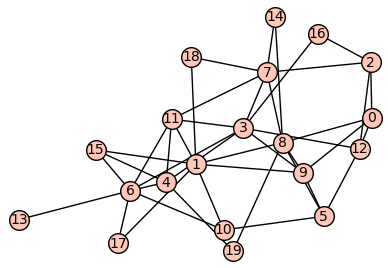

Iteration 4:
  Approximate minimum SDCTD set: [1, 2, 6, 7, 8, 13, 14, 17]
  Size of the min SDCTD set: 8
  Graph edges: [(0, 5, None), (0, 8, None), (0, 15, None), (1, 2, None), (1, 11, None), (2, 16, None), (2, 17, None), (2, 4, None), (2, 9, None), (2, 12, None), (2, 15, None), (3, 7, None), (3, 11, None), (4, 16, None), (4, 17, None), (4, 5, None), (4, 10, None), (4, 12, None), (5, 17, None), (5, 19, None), (5, 6, None), (5, 7, None), (5, 12, None), (6, 18, None), (6, 7, None), (6, 12, None), (7, 19, None), (7, 10, None), (7, 14, None), (7, 15, None), (8, 19, None), (8, 15, None)]
--------------------------------------------------


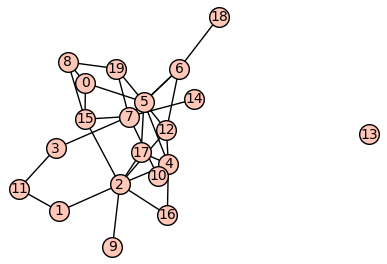

Iteration 5:
  Approximate minimum SDCTD set: [0, 2, 8, 9, 10, 16]
  Size of the min SDCTD set: 6
  Graph edges: [(0, 17, None), (0, 5, None), (0, 6, None), (0, 9, None), (0, 15, None), (1, 18, None), (1, 3, None), (1, 5, None), (1, 6, None), (1, 10, None), (1, 13, None), (1, 15, None), (2, 19, None), (2, 12, None), (2, 13, None), (3, 16, None), (3, 18, None), (3, 8, None), (3, 10, None), (3, 14, None), (3, 15, None), (4, 5, None), (4, 6, None), (4, 8, None), (4, 10, None), (4, 11, None), (4, 12, None), (4, 13, None), (4, 14, None), (4, 15, None), (5, 19, None), (5, 8, None), (5, 10, None), (5, 12, None), (5, 14, None), (6, 16, None), (6, 13, None), (7, 16, None), (7, 18, None), (7, 19, None), (7, 12, None), (8, 18, None), (8, 11, None), (8, 13, None), (8, 14, None)]
--------------------------------------------------


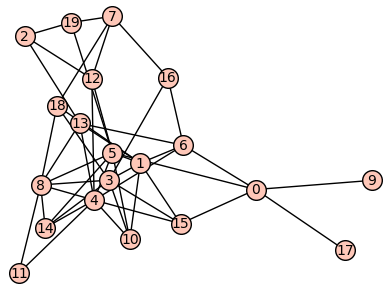

Iteration 6:
  Approximate minimum SDCTD set: [1, 3, 4, 6, 8, 11]
  Size of the min SDCTD set: 6
  Graph edges: [(0, 18, None), (0, 3, None), (0, 6, None), (0, 10, None), (0, 13, None), (1, 17, None), (1, 9, None), (1, 12, None), (2, 16, None), (2, 17, None), (2, 19, None), (2, 5, None), (2, 10, None), (2, 11, None), (2, 12, None), (3, 17, None), (3, 5, None), (3, 10, None), (3, 11, None), (3, 12, None), (3, 13, None), (3, 14, None), (3, 15, None), (4, 16, None), (4, 18, None), (4, 19, None), (4, 7, None), (4, 12, None), (5, 6, None), (5, 13, None), (6, 11, None), (6, 12, None), (7, 8, None), (7, 11, None), (7, 12, None), (7, 15, None), (8, 16, None), (8, 9, None)]
--------------------------------------------------


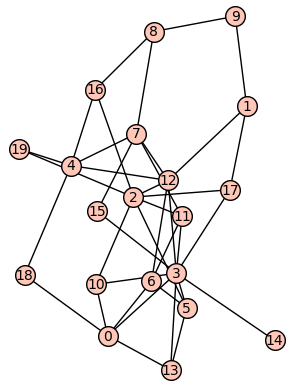

Iteration 7:
  Approximate minimum SDCTD set: [0, 2, 4, 7, 8, 9, 10, 14]
  Size of the min SDCTD set: 8
  Graph edges: [(0, 16, None), (0, 1, None), (0, 3, None), (0, 5, None), (0, 6, None), (0, 11, None), (1, 16, None), (1, 6, None), (1, 8, None), (1, 9, None), (1, 11, None), (2, 16, None), (2, 4, None), (2, 5, None), (2, 7, None), (2, 10, None), (2, 15, None), (3, 19, None), (3, 5, None), (3, 15, None), (4, 16, None), (4, 18, None), (4, 19, None), (4, 6, None), (4, 12, None), (4, 13, None), (5, 16, None), (5, 17, None), (5, 7, None), (5, 8, None), (5, 11, None), (5, 13, None), (6, 16, None), (6, 18, None), (6, 7, None), (6, 10, None), (7, 8, None), (7, 9, None), (7, 13, None), (8, 17, None), (8, 18, None), (8, 19, None)]
--------------------------------------------------


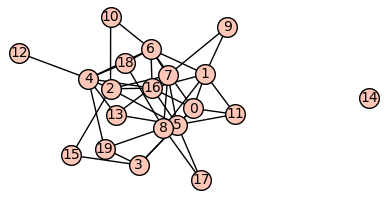

Iteration 8:
  Approximate minimum SDCTD set: [1, 2, 6, 7, 8, 14, 16, 18, 19]
  Size of the min SDCTD set: 9
  Graph edges: [(0, 16, None), (0, 17, None), (0, 2, None), (0, 10, None), (1, 16, None), (1, 17, None), (1, 12, None), (2, 6, None), (2, 9, None), (2, 13, None), (2, 15, None), (3, 11, None), (3, 13, None), (3, 14, None), (3, 15, None), (4, 10, None), (4, 11, None), (4, 14, None), (5, 16, None), (5, 13, None), (6, 16, None), (6, 8, None), (6, 9, None), (6, 10, None), (6, 14, None), (7, 17, None), (7, 8, None), (7, 9, None), (7, 13, None), (7, 14, None), (7, 15, None), (8, 11, None)]
--------------------------------------------------


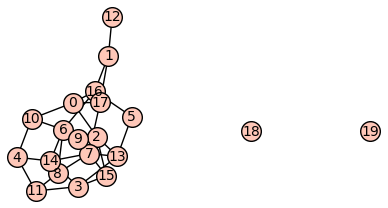

Iteration 9:
  Approximate minimum SDCTD set: [0, 1, 5, 6, 8, 10, 19]
  Size of the min SDCTD set: 7
  Graph edges: [(0, 17, None), (0, 4, None), (0, 7, None), (0, 8, None), (0, 9, None), (1, 16, None), (1, 17, None), (1, 2, None), (1, 18, None), (1, 4, None), (1, 5, None), (1, 8, None), (1, 13, None), (2, 4, None), (2, 7, None), (2, 8, None), (2, 9, None), (3, 19, None), (3, 4, None), (3, 5, None), (3, 8, None), (3, 14, None), (4, 5, None), (4, 6, None), (4, 7, None), (4, 8, None), (4, 9, None), (4, 10, None), (4, 11, None), (4, 13, None), (4, 15, None), (5, 17, None), (5, 10, None), (5, 12, None), (5, 13, None), (5, 15, None), (6, 17, None), (6, 10, None), (6, 14, None), (7, 8, None), (7, 9, None), (8, 17, None), (8, 11, None), (8, 14, None)]
--------------------------------------------------


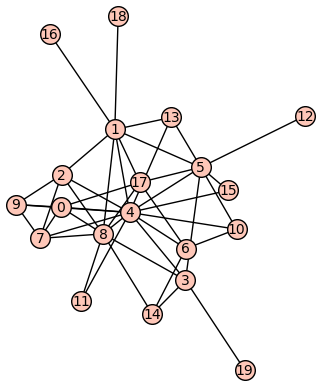

Iteration 10:
  Approximate minimum SDCTD set: [2, 3, 4, 5, 6, 7]
  Size of the min SDCTD set: 6
  Graph edges: [(0, 7, None), (0, 9, None), (0, 10, None), (0, 11, None), (0, 12, None), (0, 15, None), (1, 2, None), (1, 4, None), (1, 5, None), (1, 7, None), (1, 9, None), (2, 16, None), (2, 3, None), (2, 19, None), (2, 4, None), (2, 6, None), (2, 8, None), (3, 16, None), (3, 19, None), (3, 4, None), (3, 10, None), (3, 13, None), (3, 14, None), (4, 17, None), (4, 18, None), (4, 6, None), (4, 8, None), (4, 11, None), (4, 14, None), (4, 15, None), (6, 19, None), (6, 7, None), (6, 9, None), (6, 11, None), (6, 12, None), (6, 13, None), (7, 19, None), (7, 12, None), (7, 13, None), (8, 16, None), (8, 18, None), (8, 10, None), (8, 12, None)]
--------------------------------------------------


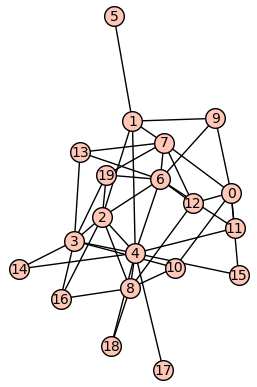

In [9]:
import random

#TREBA JE POPRAVITI FUNKCIJO ZA MAX SDCTD SAJ NE IZBERE NAJMANJŠE MAX SDCTD MNOŽICE
# Assuming that is_sdctd, random_search_sdctd, and random_search_max_sdctd are already defined

for i in range(10):  # Repeat the process 10 times
    # Initialize a random graph with 9 vertices
    g = Graph(20)  
    g.add_edges([(i, j) for i in range(9) for j in range(i + 1, 20) if random.random() < 0.3])
    
    # Find approximate minimum SDCTD set
    best_sdctd, best_size = random_search_sdctd(g, iterations=1000, inclusion_prob=0.5)
    
    # Find approximate maximum SDCTD set
    #best_sdctd2, best_size2 = random_search_max_sdctd(g, iterations=1000, inclusion_prob=0.5)
    
    # Print results for each iteration
    print(f"Iteration {i + 1}:")
    print("  Approximate minimum SDCTD set:", best_sdctd)
    print("  Size of the min SDCTD set:", best_size)
    #print("  Approximate maximum SDCTD set:", best_sdctd2)
    #print("  Size of the max SDCTD set:", best_size2)
    print("  Graph edges:", g.edges())  # Display the edges of the graph (replace if necessary)
    print("-" * 50)  # Separator for readability between iterations
    g.show()


In [10]:
#funkciji za min in max sta napačni

import random

def find_graph_with_max_min_sdctd(iterations=100, graph_size=9, search_iterations=1000, inclusion_prob=0.5):
    max_min_sdctd_graph = None
    max_min_sdctd_set = []
    max_min_sdctd_size = 0
    
    for i in range(iterations):
        # Generate a random graph
        g = Graph(graph_size)
        g.add_edges([(i, j) for i in range(graph_size) for j in range(i + 1, graph_size) if random.random() < 0.3])

        # Find approximate maximum SDCTD set
        _, best_size2 = random_search_max_sdctd(g, iterations=search_iterations, inclusion_prob=inclusion_prob)

        # Update if this graph has a larger minimum SDCTD size
        if best_size2 > max_min_sdctd_size:
            max_min_sdctd_graph = g
            max_min_sdctd_set = best_sdctd2
            max_min_sdctd_size = best_size2

    return max_min_sdctd_graph, max_min_sdctd_set, max_min_sdctd_size

# Run the function and display the results
selected_graph, best_sdctd_set, best_sdctd_size = find_graph_with_max_min_sdctd()
print("Graph with maximum minimum SDCTD set size:")
print("  SDCTD set:", best_sdctd_set)
print("  SDCTD set size:", best_sdctd_size)
print("  Graph edges:", selected_graph.edges())  # Replace with `selected_graph.show()` if needed
selected_graph.show()


NameError: name 'random_search_max_sdctd' is not defined

In [15]:
import random

def find_graph_with_largest_sdctd(n, iterations=1000):
    best_graph = None
    best_sdctd = -1  # Start with a very low number

    for _ in range(iterations):
        # Generate a random graph on n vertices
        g = Graph()
        g.add_vertices(range(n))  # Corrected: Add vertices using range(n)
        for i in range(n):
            for j in range(i + 1, n):
                if random.random() < 0.5:  # Probability to add an edge
                    g.add_edge(i, j)

        # Calculate the SDCTD domination number for the current graph
        dom_number = random_search_sdctd(g)
        
        # If this graph has a higher SDCTD domination number, keep it
        if dom_number is not None and dom_number > best_sdctd:
            best_sdctd = dom_number
            best_graph = g

    if best_graph is not None:
        print(f"Best graph found with SDCTD domination number {best_sdctd}:")
        best_graph.show()  # Display the best graph found
        return best_graph
    else:
        print("No graph found with a valid SDCTD domination number.")
        return None

In [20]:
def random_graph(n):
    return graphs.RandomGNP(n, 0.5)  # Adjust the probability as needed

def find_graph_with_largest_sdctd(n, iterations):
    best_graph = None
    best_domination_number = None

    for _ in range(iterations):
        g = random_graph(n)
        result = random_search_sdctd(g)
        
        # Check if result is a tuple and extract the domination number
        if isinstance(result, tuple):
            domination_number = result[0]
            if best_domination_number is None or domination_number > best_domination_number:
                best_domination_number = domination_number
                best_graph = g
    
    return best_graph, best_domination_number

find_graph_with_largest_sdctd(50, iterations=1000)

KeyboardInterrupt: 

In [0]:
find_graph_with_largest_sdctd(50, iterations=1000)

In [13]:
#5.točka
#za majhne grafe

def vsota(g):
    h = g.complement()
    return SDCTD_stevilo(g) + SDCTD_stevilo(h)
    

6


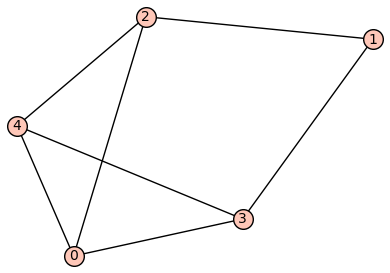

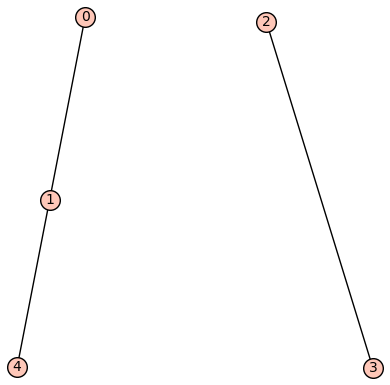

In [16]:
g = Graph([(0,1),(1,2),(2,3)])

n = 5 
p = 0.5 
m = graphs.RandomGNP(n, p)


h = m.complement()
print(vsota(m))
m.show()
h.show()

Iteration 1:
  SDCTD sum (m + complement): 5


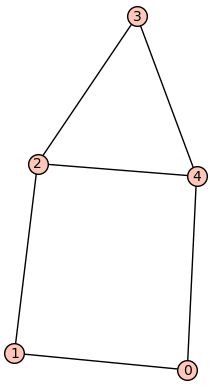

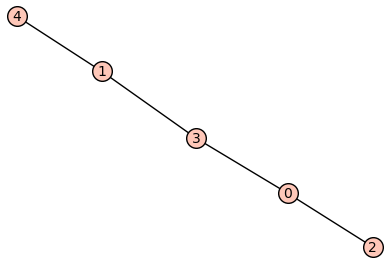

Iteration 2:
  SDCTD sum (m + complement): 5


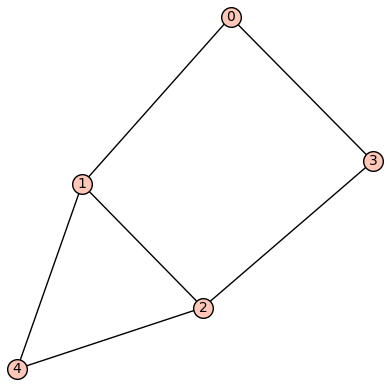

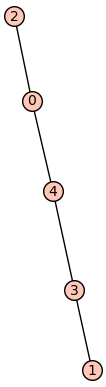

Slaba, graf nima SDCTD dominacije


TypeError: unsupported operand parent(s) for +: '<class 'NoneType'>' and 'Integer Ring'

In [18]:
# Assuming SDCTD_stevilo(g) is a function that returns the SDCTD number of the graph g

def vsota(g):
    # Get the complement of the graph g
    h = g.complement()
    
    # Return the sum of the SDCTD numbers for g and its complement h
    return SDCTD_stevilo(g) + SDCTD_stevilo(h)

# Parameters
n = 5  # Number of vertices
p = 0.5  # Probability of each edge being present

# Repeat 10 times
for i in range(10):
    # Generate a random graph
    m = graphs.RandomGNP(n, p)
    
    # Calculate the sum of SDCTD numbers for m and its complement
    total_sdctd = vsota(m)
    
    # Display the result
    print(f"Iteration {i + 1}:")
    print("  SDCTD sum (m + complement):", total_sdctd)
    
    # Show the graphs
    m.show()
    m.complement().show()


Slaba, graf nima SDCTD dominacije
Error with graph RandomGNP(5,0.500000000000000): unsupported operand parent(s) for +: '<class 'NoneType'>' and 'Integer Ring'
Skipping Iteration 1 due to error.
Iteration 2:
  SDCTD sum (m + complement): 5


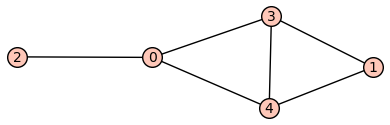

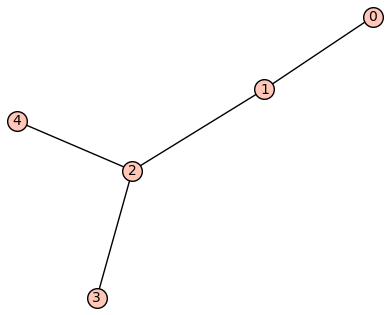

Slaba, graf nima SDCTD dominacije
Error with graph RandomGNP(5,0.500000000000000): unsupported operand parent(s) for +: '<class 'NoneType'>' and 'Integer Ring'
Skipping Iteration 3 due to error.
Slaba, graf nima SDCTD dominacije
Error with graph RandomGNP(5,0.500000000000000): unsupported operand parent(s) for +: 'Integer Ring' and '<class 'NoneType'>'
Skipping Iteration 4 due to error.
Iteration 5:
  SDCTD sum (m + complement): 4


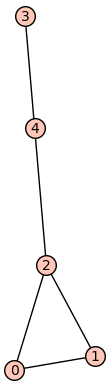

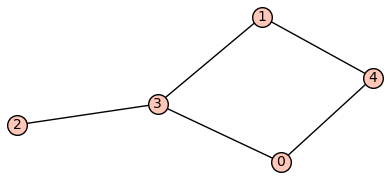

Iteration 6:
  SDCTD sum (m + complement): 5


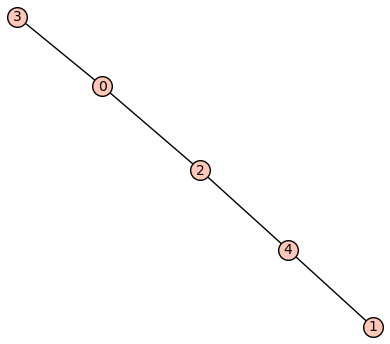

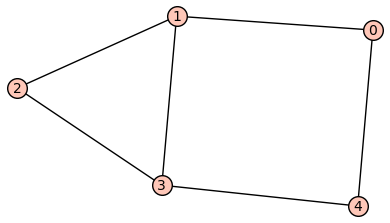

Slaba, graf nima SDCTD dominacije
Error with graph RandomGNP(5,0.500000000000000): unsupported operand parent(s) for +: 'Integer Ring' and '<class 'NoneType'>'
Skipping Iteration 7 due to error.
Iteration 8:
  SDCTD sum (m + complement): 4


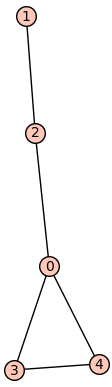

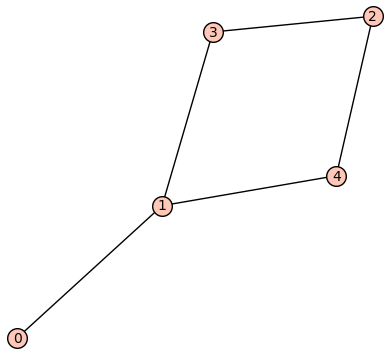

Iteration 9:
  SDCTD sum (m + complement): 5


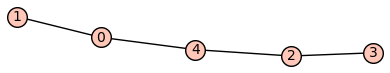

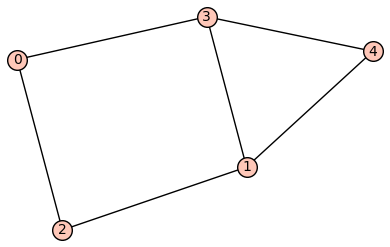

Slaba, graf nima SDCTD dominacije
Error with graph RandomGNP(5,0.500000000000000): unsupported operand parent(s) for +: '<class 'NoneType'>' and 'Integer Ring'
Skipping Iteration 10 due to error.


In [19]:
# Assuming SDCTD_stevilo(g) is a function that returns the SDCTD number of the graph g

def vsota(g):
    try:
        # Get the complement of the graph g
        h = g.complement()
        
        # Return the sum of the SDCTD numbers for g and its complement h
        return SDCTD_stevilo(g) + SDCTD_stevilo(h)
    except Exception as e:
        # If an error occurs (e.g., no SDCTD set found), print the message and return None
        print(f"Error with graph {g}: {e}")
        return None

# Parameters
n = 5  # Number of vertices
p = 0.5  # Probability of each edge being present

# Repeat 10 times
for i in range(10):
    # Generate a random graph
    m = graphs.RandomGNP(n, p)
    
    # Calculate the sum of SDCTD numbers for m and its complement
    total_sdctd = vsota(m)
    
    # Check if we got a valid result (not None)
    if total_sdctd is not None:
        # Display the result
        print(f"Iteration {i + 1}:")
        print("  SDCTD sum (m + complement):", total_sdctd)
        
        # Show the graphs
        m.show()
        m.complement().show()
    else:
        # Skip the rest of the code for this iteration if no valid SDCTD set
        print(f"Skipping Iteration {i + 1} due to error.")


Iteration 1:
  Total number of edges in m: 2


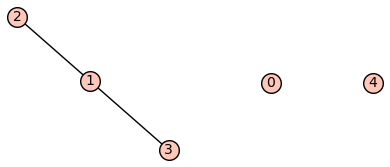

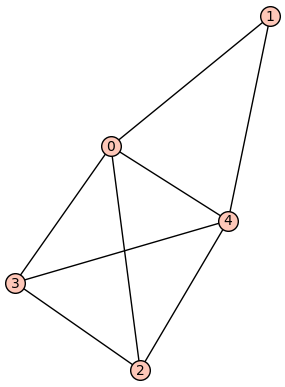

Iteration 2:
  Total number of edges in m: 4


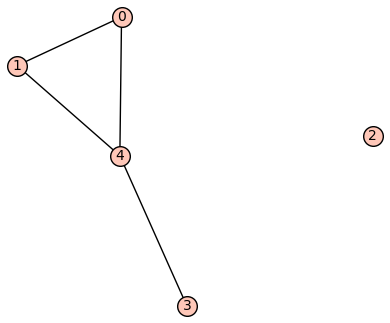

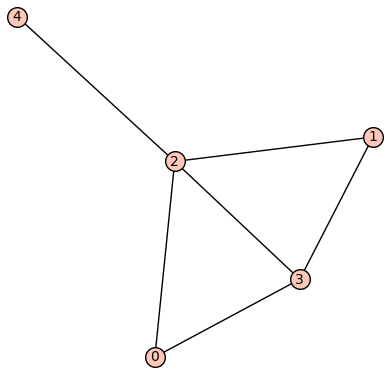

Iteration 3:
  Total number of edges in m: 5


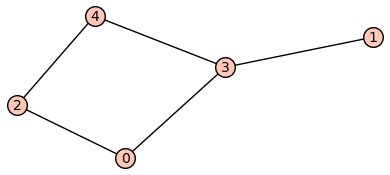

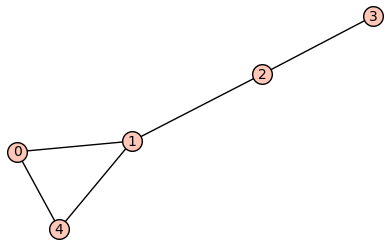

Iteration 4:
  Total number of edges in m: 3


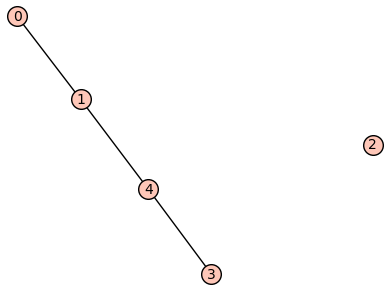

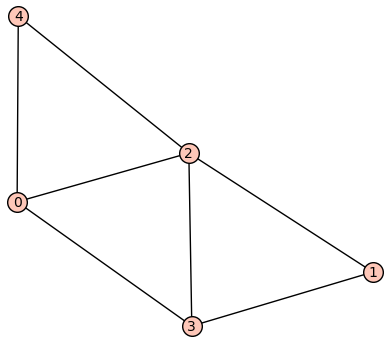

Iteration 5:
  Total number of edges in m: 4


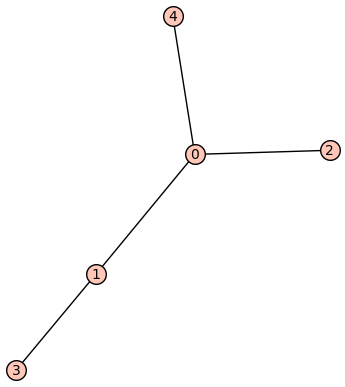

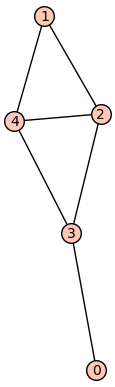

Iteration 6:
  Total number of edges in m: 7


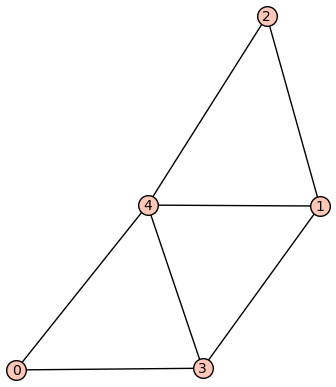

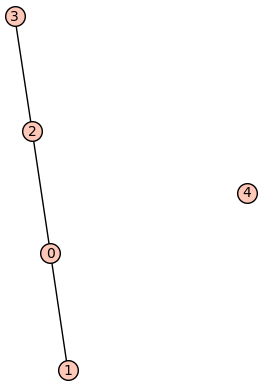

Iteration 7:
  Total number of edges in m: 4


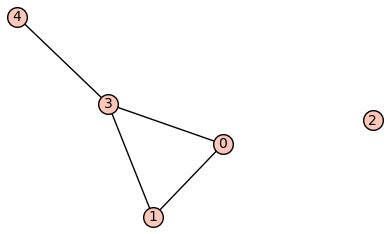

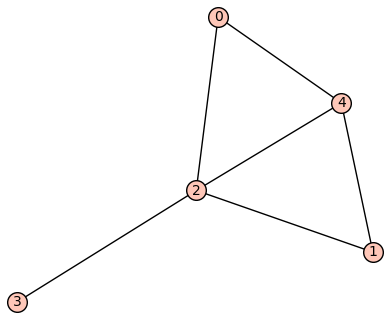

Iteration 8:
  Total number of edges in m: 5


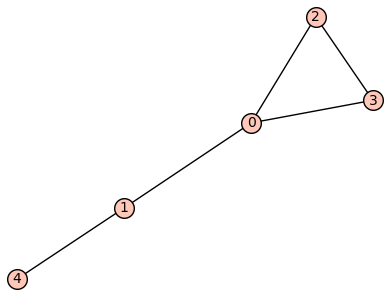

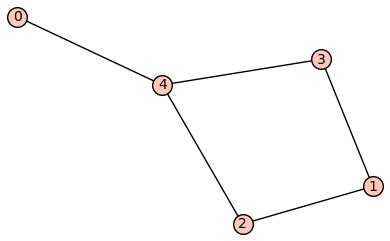

Iteration 9:
  Total number of edges in m: 6


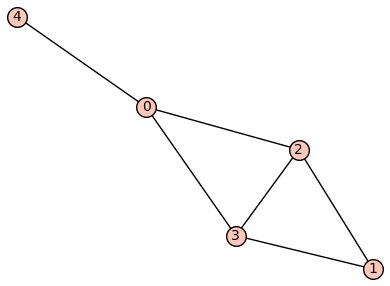

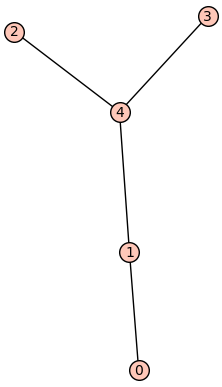

Iteration 10:
  Total number of edges in m: 4


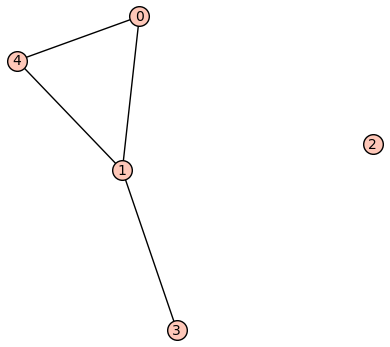

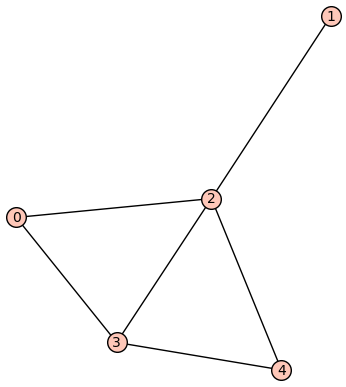

In [17]:
n = 5  # Number of vertices
p = 0.5  # Probability of each edge being present

for i in range(10):
    # Generate a random graph with 5 vertices
    m = graphs.RandomGNP(n, p)
    
    # Compute the complement graph
    h = m.complement()
    
    # Calculate the total number of edges in the graph `m`
    total_edges = m.size()  # `size()` gives the number of edges in the graph
    
    # Display the results
    print(f"Iteration {i + 1}:")
    print("  Total number of edges in m:", total_edges)
    
    # Show the graphs
    m.show()
    h.show()


In [0]:
#NEPOTREBNI DODATKI
##na to kodo se ne oziraj
def Dominacijsko_stevilo(g):
    h = g.complement()

    p = MixedIntegerLinearProgram(maximization=False)
    x = p.new_variable(binary=True)
    p.set_objective(sum([x[v] for v in g.vertices()]))

    for v in g.vertices():
        neighbors = g.neighbors(v)  
        if neighbors:
            p.add_constraint(sum((x[w] + x[v]) for w in neighbors) >= 1)
        else:
            p.add_constraint(x[v] == 1)
            
    zaustavi = False

    for v in g.vertices():
        neighbors_complement = h.neighbors(v)
        if neighbors_complement:
            p.add_constraint(sum(x[w] for w in neighbors_complement) >= 1)
        else:
            print("Slaba, graf nima SDCTD dominacije")
            zaustavi = True
            break

    if not zaustavi:
            p.solve()  
            x_values = p.get_values(x)  
            prestej_izbrana_vozlisca = sum(1 for i in x_values.values() if i == 1)
            izbrana_vozlisca = [v for v, i in x_values.items() if i == 1]
            #print("Izbrana vozlišča za graf:", izbrana_vozlisca)    
            return prestej_izbrana_vozlisca 
    else:
        return None  


for q in graphs(4):
    print(Dominacijsko_stevilo(q))
    
    q.show()
    
#koda ni preverjena
def select_diameter_2_graphs(n):
    # Generate all graphs on n vertices
    all_graphs = list(graphs(n))
    
    # List to store graphs with diameter 2
    diameter_2_graphs = []
    
    # Check the diameter of each graph
    for g in all_graphs:
        if g.diameter() == 2:
            diameter_2_graphs.append(g)
    
    # Print the graphs with diameter 2
    if diameter_2_graphs:
        print(f"Graphs with diameter 2 on {n} vertices:")
        for g in diameter_2_graphs:
            g.show()  # Display the graph
    else:
        print(f"No graphs with diameter 2 found on {n} vertices.")